In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

- ÁîüÊàêÊ®°ÊãüÊï∞ÊçÆ

In [2]:
def linearModel(X: torch.tensor, w: torch.tensor)-> torch.tensor:
    return X@w.reshape(-1, 1)

In [3]:
# ÁîüÊàêÊï∞ÊçÆ
true_w = torch.tensor([2, -3.4, 4.2])  # ÊùÉÈáç+ÂÅèÁΩÆ
num_inputs = true_w.numel()  # ÊùÉÈáçÊï∞Èáè(true_w‰∏≠ÂÖÉÁ¥†‰∏™Êï∞)
num_examples = 1000  # Ê†∑Êú¨Êï∞Èáè
features = torch.cat([torch.randn(num_examples, num_inputs - 1), torch.ones(num_examples).reshape(-1, 1)], axis=1 ) # ÈöèÊú∫ÁîüÊàê1000‰∏™ÁâπÂæÅ(1000*2) Âä†‰∏äÂÅèÁΩÆ
labels = linearModel(features, true_w) + torch.randn(num_examples).reshape(-1, 1) * 0.01  # Â∞ÜÈöèÊú∫ÁîüÊàêÁöÑÁâπÂæÅËæìÂÖ•linearModelÔºåÁÑ∂ÂêéÂä†ÂÖ•ÈöèÊú∫È°πÔºàË°®Á§∫ÂÅèÂ∑ÆÔºâ

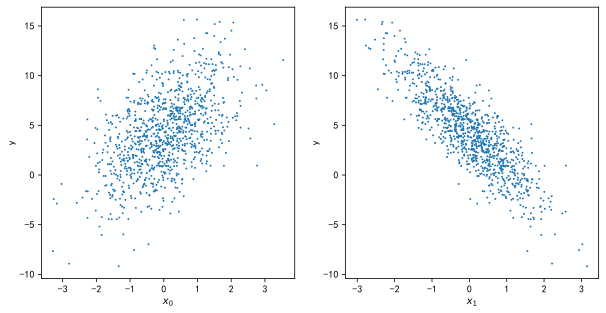

In [4]:
plt.rcParams['figure.figsize'] = (8, 3)
fig = plt.figure(figsize=(10,5))
# yÈöèÁ¨¨1‰∏™ÁâπÂæÅx_0ÁöÑÊï£ÁÇπÂõæ
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("y")
ax1.scatter(features[:, 0].numpy(), labels.numpy(), s=1)
# yÈöèÁ¨¨2‰∏™ÁâπÂæÅx_1ÁöÑÊï£ÁÇπÂõæ
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("y")
ax2.scatter(features[:, 1].numpy(), labels.numpy(), s=1);

- `mse`ÊçüÂ§±ÂáΩÊï∞

In [5]:
def meanSquaredLoss(X: torch.tensor, y: torch.tensor, w: torch.tensor) -> torch.tensor:
    """
    y: Ê†áÁ≠æ
    """
    hat_y = X @ w.reshape(-1, 1)
    sLoss = torch.dot(hat_y.reshape(-1) - y.reshape(-1), hat_y.reshape(-1) - y.reshape(-1)) / y.numel()
    return sLoss

In [6]:
def grad_mse_w(X, y, w):
    '''
    X: N*a, N‰∏∫Ê†∑Êú¨Êï∞ÈáèÔºåa‰∏∫ÔºàÂ¢ûÂπøÔºâÁâπÂæÅÁª¥Â∫¶
    y: N
    w: a*1
    '''
    return 2*(X.t()@(X@w.reshape(-1, 1) - y.reshape(-1, 1))) / y.numel()

## 1. Ê¢ØÂ∫¶‰∏ãÈôç(gradient descendent)

- Ëß£Èáä1

ÂÅáËÆæÁõÆÊ†áÂáΩÊï∞$f: \mathbb{R}^d \rightarrow \mathbb{R}$ÁöÑËæìÂÖ•ÊòØ‰∏Ä‰∏™$d$Áª¥ÂêëÈáè$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$„ÄÇÁõÆÊ†áÂáΩÊï∞$f(\boldsymbol{x})$ÊúâÂÖ≥$\boldsymbol{x}$ÁöÑÊ¢ØÂ∫¶ÊòØ‰∏Ä‰∏™Áî±$d$‰∏™ÂÅèÂØºÊï∞ÁªÑÊàêÁöÑÂêëÈáèÔºö

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$

‰∏∫Ë°®Á§∫ÁÆÄÊ¥ÅÔºåÊàë‰ª¨Áî®$\nabla f(\boldsymbol{x})$‰ª£Êõø$\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$„ÄÇÊ¢ØÂ∫¶‰∏≠ÊØè‰∏™ÂÅèÂØºÊï∞ÂÖÉÁ¥†$\partial f(\boldsymbol{x})/\partial x_i$‰ª£Ë°®ÁùÄ$f$Âú®$\boldsymbol{x}$ÊúâÂÖ≥ËæìÂÖ•$x_i$ÁöÑÂèòÂåñÁéá„ÄÇ‰∏∫‰∫ÜÊµãÈáè$f$Ê≤øÁùÄÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$ÔºàÂç≥$\|\boldsymbol{u}\|=1$ÔºâÊñπÂêë‰∏äÁöÑÂèòÂåñÁéáÔºåÂú®Â§öÂÖÉÂæÆÁßØÂàÜ‰∏≠ÔºåÊàë‰ª¨ÂÆö‰πâ$f$Âú®$\boldsymbol{x}$‰∏äÊ≤øÁùÄ$\boldsymbol{u}$ÊñπÂêëÁöÑÊñπÂêëÂØºÊï∞‰∏∫

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0}  \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

‰ª•‰∏äÊñπÂêëÂØºÊï∞ÂèØ‰ª•ÊîπÂÜô‰∏∫

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

ÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$ÁªôÂá∫‰∫Ü$f$Âú®$\boldsymbol{x}$‰∏äÊ≤øÁùÄÊâÄÊúâÂèØËÉΩÊñπÂêëÁöÑÂèòÂåñÁéá„ÄÇ‰∏∫‰∫ÜÊúÄÂ∞èÂåñ$f$ÔºåÊàë‰ª¨Â∏åÊúõÊâæÂà∞$f$ËÉΩË¢´Èôç‰ΩéÊúÄÂø´ÁöÑÊñπÂêë„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$Êù•ÊúÄÂ∞èÂåñÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$„ÄÇ

Áî±‰∫é$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \|\nabla f(\boldsymbol{x})\| \cdot \|\boldsymbol{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\boldsymbol{x})\|  \cdot \text{cos} (\theta)$Ôºå
ÂÖ∂‰∏≠$\theta$‰∏∫Ê¢ØÂ∫¶$\nabla f(\boldsymbol{x})$ÂíåÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$‰πãÈó¥ÁöÑÂ§πËßíÔºåÂΩì$\theta = \pi$Êó∂Ôºå$\text{cos}(\theta)$ÂèñÂæóÊúÄÂ∞èÂÄº$-1$„ÄÇÂõ†Ê≠§ÔºåÂΩì$\boldsymbol{u}$Âú®Ê¢ØÂ∫¶ÊñπÂêë$\nabla f(\boldsymbol{x})$ÁöÑÁõ∏ÂèçÊñπÂêëÊó∂ÔºåÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$Ë¢´ÊúÄÂ∞èÂåñ„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØËÉΩÈÄöËøáÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÊù•‰∏çÊñ≠Èôç‰ΩéÁõÆÊ†áÂáΩÊï∞$f$ÁöÑÂÄºÔºö

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

ÂêåÊ†∑ÔºåÂÖ∂‰∏≠$\eta$ÔºàÂèñÊ≠£Êï∞ÔºâÁß∞‰ΩúÂ≠¶‰π†Áéá„ÄÇ

- Ëß£Èáä2

ËÄÉËôë$\mathbf{x} \in \mathbb{R}^d$, ÂÖ∂‰∏≠$\mathbf{x}$‰∏∫ÂêëÈáè, ÁõÆÊ†áÂáΩÊï∞$f: \mathbb{R}^d \to \mathbb{R}$Êò†Â∞ÑËá≥Ê†áÈáè„ÄÇÂØπÂ∫îÁöÑ$f$ÂÖ≥‰∫é$\mathbf{x}$ÊØè‰∏ÄÁª¥Â∫¶$x_i$ÁöÑÂÅèÂØºÊûÑÊàêÊ¢ØÂ∫¶

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Âà©Áî®Ê≥∞ÂãíÂ±ïÂºÄÂºèÂèØÂæó

$$f(\mathbf{x} + \Delta x) = f(\mathbf{x}) + \Delta\mathbf{x}^\top \nabla f(\mathbf{x}) + O(|\mathbf{\Delta x}|^2).$$ 

Êç¢ËÄåË®Ä‰πãÔºåÊúÄÈÄü‰∏ãÈôçÊñπÂêëÁî±$-\nabla f(\mathbf{x})$ÁªôÂá∫„ÄÇ‰ª§$\Delta \mathbf{x}=-\eta \nabla f(\mathbf{x})$

$$f(\mathbf{x} + \Delta x) = f(\mathbf{x}) - \eta \nabla f(\mathbf{x})^T \nabla f(\mathbf{x}) + O(|\Delta x|^2).$$ 

ÈÄâÂÆöÂêàÈÄÇÁöÑÂ≠¶‰π†Áéá$\eta > 0$ÔºåÂàôÂèØÂæóÊ¢ØÂ∫¶‰∏ãÈôçÊõ¥Êñ∞ÂÖ¨Âºè

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$$

ÊâπÈáèÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂú®ÊØèÊ¨°Ëø≠‰ª£Êó∂ÈúÄË¶ÅËÆ°ÁÆóÊØè‰∏™Ê†∑Êú¨‰∏äÊçüÂ§±ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶Âπ∂Ê±ÇÂíå„ÄÇÂΩìËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊ†∑Êú¨Êï∞ÈáèùëÅÂæàÂ§ßÊó∂ÔºåÁ©∫Èó¥Â§çÊùÇÂ∫¶ÊØîËæÉÈ´òÔºåÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰πüÂæàÂ§ß„ÄÇ

**ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç**

> $f_i(\boldsymbol{x})$ÊòØÊúâÂÖ≥Á¥¢Âºï‰∏∫$i$ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨ÁöÑÊçüÂ§±ÂáΩÊï∞Ôºå$n$ÊòØËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨Êï∞Ôºå$\boldsymbol{x}$ÊòØÊ®°ÂûãÁöÑÂèÇÊï∞ÂêëÈáèÔºåÈÇ£‰πàÁõÆÊ†áÂáΩÊï∞ÂÆö‰πâ‰∏∫
> 
> $$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$
> 
> ÁõÆÊ†áÂáΩÊï∞Âú®$\boldsymbol{x}$Â§ÑÁöÑÊ¢ØÂ∫¶ËÆ°ÁÆó‰∏∫
> 
>$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$
>
> Â¶ÇÊûú‰ΩøÁî®Ê¢ØÂ∫¶‰∏ãÈôçÔºåÊØèÊ¨°Ëá™ÂèòÈáèËø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰∏∫$\mathcal{O}(n)$ÔºåÂÆÉÈöèÁùÄ$n$Á∫øÊÄßÂ¢ûÈïø„ÄÇÂõ†Ê≠§ÔºåÂΩìËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨Êï∞ÂæàÂ§ßÊó∂ÔºåÊ¢ØÂ∫¶‰∏ãÈôçÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄÂæàÈ´ò„ÄÇ
>
> ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÔºàstochastic gradient descentÔºåSGDÔºâÂáèÂ∞ë‰∫ÜÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ„ÄÇÂú®ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÁöÑÊØèÊ¨°Ëø≠‰ª£‰∏≠ÔºåÊàë‰ª¨ÈöèÊú∫ÂùáÂåÄÈááÊ†∑ÁöÑ‰∏Ä‰∏™Ê†∑Êú¨Á¥¢Âºï$i\in\{1,\ldots,n\}$ÔºåÂπ∂ËÆ°ÁÆóÊ¢ØÂ∫¶$\nabla f_i(\boldsymbol{x})$Êù•Ëø≠‰ª£$\boldsymbol{x}$Ôºö
>
> $$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$
>
> ËøôÈáå$\eta$ÂêåÊ†∑ÊòØÂ≠¶‰π†Áéá„ÄÇÂèØ‰ª•ÁúãÂà∞ÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰ªéÊ¢ØÂ∫¶‰∏ãÈôçÁöÑ$\mathcal{O}(n)$ÈôçÂà∞‰∫ÜÂ∏∏Êï∞$\mathcal{O}(1)$„ÄÇ
>
> ÂÄºÂæóÂº∫Ë∞ÉÁöÑÊòØÔºåÈöèÊú∫Ê¢ØÂ∫¶$\nabla f_i(\boldsymbol{x})$ÊòØÂØπÊ¢ØÂ∫¶$\nabla f(\boldsymbol{x})$ÁöÑÊó†ÂÅè‰º∞ËÆ°Ôºö
>
> $$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$
>
> ËøôÊÑèÂë≥ÁùÄÔºåÂπ≥ÂùáÊù•ËØ¥ÔºåÈöèÊú∫Ê¢ØÂ∫¶ÊòØÂØπÊ¢ØÂ∫¶ÁöÑ‰∏Ä‰∏™ËâØÂ•ΩÁöÑ‰º∞ËÆ°„ÄÇ

- `numpy`ÂÆûÁé∞

In [7]:
def f(x):
    """
    ÂáΩÊï∞: f(x0, x1) = x0**2 + x1**2
    """
    return x[0] ** 2 + 2 * x[1] ** 2  # objective

def grad_f(x):
    """
    f(x)ÁöÑÊ¢ØÂ∫¶
    """
    return np.array([2 * x[0], 4 * x[1]])  # gradient

In [8]:
def gd_numpy(f, grad_f, x0, learn_rate=0.05, max_iter=100):
    """
    f: ÂæÖ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞, grad_f: fÁöÑÊ¢ØÂ∫¶, x0: ÂèÇÊï∞ÂàùÂÄº, learn_rate: Â≠¶‰π†Áéá
    """
    trace_x = np.array([x0])  # xÁöÑÂéÜÂè≤ËÆ∞ÂΩï
    x = x0
    i = 1
    while i <= max_iter:
        x = x - learn_rate * grad_f(x)  # Êõ¥Êñ∞xÁöÑÂÄº
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        i += 1
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [9]:
res = gd_numpy(f, grad_f, x0=np.array([3, 3]), learn_rate=0.1)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 1.812280
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.163958
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.017420
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.001869
Ëø≠‰ª£Ê¨°Êï∞: 25, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000201
Ëø≠‰ª£Ê¨°Êï∞: 30, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000022
ÂÖ±Ëø≠‰ª£31Ê¨°, ÁõÆÊ†áÂáΩÊï∞: 1.3792460747519211e-05, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [0.003713820117856142, 6.632217591621993e-07]


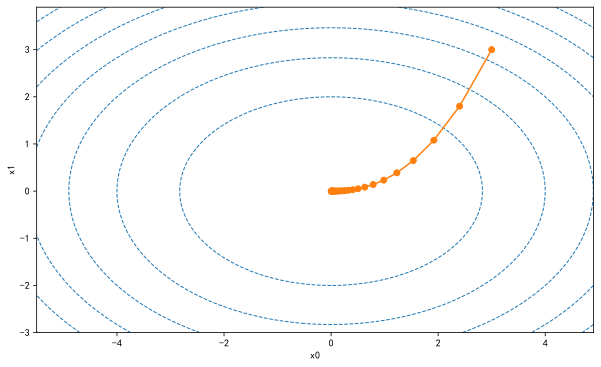

In [10]:
x0, x1 = res[:, 0], res[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁöÑ‰ºòÂåñÂáΩÊï∞

In [17]:
def grad_desc(lossfunc, w, x_dict, max_iters=200, learn_rate=0.005):
    """
    f: ÂæÖ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞, grad_f: fÁöÑÊ¢ØÂ∫¶, w: ÂèÇÊï∞ÂàùÂÄº, x_dict:Âõ∫ÂÆöÂèÇÊï∞ÂÄº, learn_rate: Â≠¶‰π†Áéá
    """
    trace_w = w.clone().data.reshape(1, -1)
    i = 0
    for i in range(max_iters):
        l = lossfunc(w=w, **x_dict)
        l.backward()
        w.data.sub_(learn_rate * w.grad.data)
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if (i + 1) % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i+1}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break

        w.grad.zero_()

    print(f"ÂÖ±Ëø≠‰ª£{i}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [18]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = grad_desc(meanSquaredLoss, w, x_dict = {'X': features, 'y': labels})

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 29.3712
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 24.1350
Ëø≠‰ª£Ê¨°Êï∞: 30, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 19.8339
Ëø≠‰ª£Ê¨°Êï∞: 40, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 16.3007
Ëø≠‰ª£Ê¨°Êï∞: 50, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 13.3981
Ëø≠‰ª£Ê¨°Êï∞: 60, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 11.0132
Ëø≠‰ª£Ê¨°Êï∞: 70, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 9.0536
Ëø≠‰ª£Ê¨°Êï∞: 80, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 7.4432
Ëø≠‰ª£Ê¨°Êï∞: 90, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 6.1198
Ëø≠‰ª£Ê¨°Êï∞: 100, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 5.0321
Ëø≠‰ª£Ê¨°Êï∞: 110, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 4.1380
Ëø≠‰ª£Ê¨°Êï∞: 120, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 3.4030
Ëø≠‰ª£Ê¨°Êï∞: 130, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.7988
Ëø≠‰ª£Ê¨°Êï∞: 140, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.3021
Ëø≠‰ª£Ê¨°Êï∞: 150, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 1.8936
Ëø≠‰ª£Ê¨°Êï∞: 160, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 1.5577
Ëø≠‰ª£Ê¨°Êï∞: 170, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 1.2815
Ëø≠‰ª£Ê¨°Êï∞: 180, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 1.0544
Ëø≠‰ª£Ê¨°Êï∞: 190, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.8676
Ëø≠‰ª£Ê¨°Êï∞: 200, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.7139
ÂÖ±Ëø≠‰ª£199Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.7139, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[1.6780132055282593], [-2.6910464763641357], [3.837735652923584]]


ÁõÆÊ†áÂáΩÊï∞ÊúâÂÖ≥Ëá™ÂèòÈáèÁöÑÊ¢ØÂ∫¶‰ª£Ë°®‰∫ÜÁõÆÊ†áÂáΩÊï∞Âú®Ëá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆ‰∏ãÈôçÊúÄÂø´ÁöÑÊñπÂêë„ÄÇÂõ†Ê≠§ÔºåÊ¢ØÂ∫¶‰∏ãÈôç‰πüÂè´‰ΩúÊúÄÈô°‰∏ãÈôçÔºàsteepest descentÔºâ„ÄÇÂú®ÊØèÊ¨°Ëø≠‰ª£‰∏≠ÔºåÊ¢ØÂ∫¶‰∏ãÈôçÊ†πÊçÆËá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆÔºåÊ≤øÁùÄÂΩìÂâç‰ΩçÁΩÆÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞Ëá™ÂèòÈáè„ÄÇ

ÁÑ∂ËÄåÔºåÂ¶ÇÊûúËá™ÂèòÈáèÁöÑËø≠‰ª£ÊñπÂêë‰ªÖ‰ªÖÂèñÂÜ≥‰∫éËá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆÔºåËøôÂèØËÉΩ‰ºöÂ∏¶Êù•‰∏Ä‰∫õÈóÆÈ¢ò„ÄÇ‰æãÂ¶ÇÔºåÂêÑÁª¥Â∫¶‰∏äÁöÑÊ¢ØÂ∫¶ÂèòÂåñÈáè‰∏ç‰∏ÄËá¥Â∏¶Êù•ÁöÑÂ≠¶‰π†ÁéáÁöÑÊùÉË°°ÈóÆÈ¢òÔºöÂ¶ÇÊûúËÆæÁΩÆËøáÂ§ßÁöÑÂ≠¶‰π†ÁéáÔºåÂàôÂ∞ÜÈîôËøáÊúÄ‰ºòÁÇπÔºåÂá∫Áé∞ÈúáËç°ÂèëÊï£ÔºõÂ¶ÇÊûúËÆæÁΩÆËøáÂ∞èÁöÑÂ≠¶‰π†ÁéáÔºåÂàôÊî∂ÁéáÁºìÊÖ¢ÔºåÂú®ÁªôÂÆöËø≠‰ª£Êó∂Èó¥ÂÜÖÊú™ËææÂà∞ÊúÄ‰ºòÁÇπ„ÄÇÂõ†Ê≠§ÔºåÂêéÁª≠ÊèêÂá∫‰ª•Âä®ÈáèÂíåËá™ÈÄÇÂ∫îÁÆóÊ≥ï‰∏∫‰ª£Ë°®ÁöÑ‰ª•‰øÆÊ≠£Ëø≠‰ª£ÁÆóÊ≥ï„ÄÇ‰ª•‰∏ã‰ªãÁªçÂÖ∂‰∏≠ÁöÑ‰∏§Áßç‰ª£Ë°®ÊÄßÁÆóÊ≥ïÔºögradient descendent with momentÂíåadam„ÄÇ

## 2. Âä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôç(gradient descendent with moment)

ËÆæÊó∂Èó¥Ê≠•$t$ÁöÑËá™ÂèòÈáè‰∏∫$\boldsymbol{x}_t$ÔºåÂ≠¶‰π†Áéá‰∏∫$\eta_t$„ÄÇÂú®Êó∂Èó¥Ê≠•$0$ÔºåÂä®ÈáèÊ≥ïÂàõÂª∫ÈÄüÂ∫¶ÂèòÈáè$\boldsymbol{v}_0$ÔºåÂπ∂Â∞ÜÂÖ∂ÂÖÉÁ¥†ÂàùÂßãÂåñÊàê0„ÄÇÂú®Êó∂Èó¥Ê≠•$t>0$ÔºåÂä®ÈáèÊ≥ïÂØπÊØèÊ¨°Ëø≠‰ª£ÁöÑÊ≠•È™§ÂÅöÂ¶Ç‰∏ã‰øÆÊîπÔºö

$$
\begin{aligned}
\boldsymbol{v}_t &\leftarrow \gamma \boldsymbol{v}_{t-1} + \eta_t \boldsymbol{g}_t, \\
\boldsymbol{x}_t &\leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{v}_t,
\end{aligned}
$$

ÂÖ∂‰∏≠ÔºåÂä®ÈáèË∂ÖÂèÇÊï∞$\gamma$Êª°Ë∂≥$0 \leq \gamma < 1$„ÄÇÂΩì$\gamma=0$Êó∂ÔºåÂä®ÈáèÊ≥ïÁ≠â‰ª∑‰∫éÂ∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç„ÄÇ

- `numpy`ÂÆûÁé∞

In [19]:
def gd_momen_numpy(f, grad_f, x0, beta=0.5, learn_rate=0.05, max_iter=100):
    trace_x = np.array([x0])
    x = x0
    m_0 = 0
    i = 1
    while i <= max_iter:
        grad = grad_f(x)
        m_1 = beta*m_0 + learn_rate*grad
        x = x - m_1
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

        m_0 = m_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [20]:
res = gd_momen_numpy(f, grad_f, x0=np.array([3, 3]), learn_rate=0.1)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.558453
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.024623
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000553
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000007
ÂÖ±Ëø≠‰ª£24Ê¨°, ÁõÆÊ†áÂáΩÊï∞: 3.023763696115125e-06, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [-0.0009630671377860814, -0.0010237835181891848]


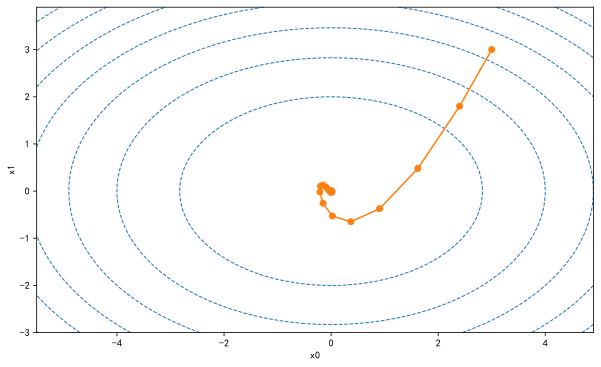

In [21]:
x0, x1 = res[:, 0], res[:, 1]

# display.set_matplotlib_formats("svg")
plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁâàÊú¨

In [22]:
def grad_desc_with_momentum(lossfunc, w, x_dict, beta=0.5, learn_rate=0.05, max_iter=1000):
    trace_w = w.clone().data.reshape(1, -1)
    v_0 = 0
    i = 1
    while i <= max_iter:
        l = lossfunc(w=w, **x_dict)
        l.backward()
        v_1 = beta*v_0 + learn_rate*w.grad.data
        w.data.sub_(v_1)
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if i % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break
   
        w.grad.zero_()
        v_0 = v_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{i-1}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [23]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = grad_desc_with_momentum(meanSquaredLoss, w, x_dict={'X': features, 'y': labels}, learn_rate=0.05)

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.1146
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001
ÂÖ±Ëø≠‰ª£23Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[2.0005276203155518], [-3.399600028991699], [4.200369834899902]]


## 3. ÈÄÇÂ∫îÊÄßÂä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôç(adaptive gradient descendent with moment)

ÁªôÂÆöË∂ÖÂèÇÊï∞$0 \leq \beta_1 < 1$ÔºàÁÆóÊ≥ï‰ΩúËÄÖÂª∫ËÆÆËÆæ‰∏∫0.9ÔºâÔºåÊó∂Èó¥Ê≠•$t$ÁöÑÂä®ÈáèÂèòÈáè$\boldsymbol{v}_t$Âç≥Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶$\boldsymbol{g}_t$ÁöÑÊåáÊï∞Âä†ÊùÉÁßªÂä®Âπ≥ÂùáÔºö

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t. $$

ÁªôÂÆöË∂ÖÂèÇÊï∞$0 \leq \beta_2 < 1$ÔºàÁÆóÊ≥ï‰ΩúËÄÖÂª∫ËÆÆËÆæ‰∏∫0.999ÔºâÔºåÂ∞ÜÂ∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊåâÂÖÉÁ¥†Âπ≥ÊñπÂêéÁöÑÈ°π$\boldsymbol{g}_t \odot \boldsymbol{g}_t$ÂÅöÊåáÊï∞Âä†ÊùÉÁßªÂä®Âπ≥ÂùáÂæóÂà∞$\boldsymbol{s}_t$Ôºö

$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

Áî±‰∫éÊàë‰ª¨Â∞Ü$\boldsymbol{v}_0$Âíå$\boldsymbol{s}_0$‰∏≠ÁöÑÂÖÉÁ¥†ÈÉΩÂàùÂßãÂåñ‰∏∫0Ôºå
Âú®Êó∂Èó¥Ê≠•$t$Êàë‰ª¨ÂæóÂà∞
$$\boldsymbol{v}_t =  (1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} \boldsymbol{g}_i.$$

Â∞ÜËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÁöÑÊùÉÂÄºÁõ∏Âä†ÔºåÂæóÂà∞ 
$$(1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} = 1 - \beta_1^t.$$

ÈúÄË¶ÅÊ≥®ÊÑèÁöÑÊòØÔºåÂΩì$t$ËæÉÂ∞èÊó∂ÔºåËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊùÉÂÄº‰πãÂíå‰ºöËæÉÂ∞è„ÄÇ‰æãÂ¶ÇÔºåÂΩì$\beta_1 = 0.9$Êó∂Ôºå$\boldsymbol{v}_1 = 0.1\boldsymbol{g}_1$„ÄÇ‰∏∫‰∫ÜÊ∂àÈô§ËøôÊ†∑ÁöÑÂΩ±ÂìçÔºåÂØπ‰∫é‰ªªÊÑèÊó∂Èó¥Ê≠•$t$ÔºåÊàë‰ª¨ÂèØ‰ª•Â∞Ü$\boldsymbol{v}_t$ÂÜçÈô§‰ª•$1 - \beta_1^t$Ôºå‰ªéËÄå‰ΩøËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊùÉÂÄº‰πãÂíå‰∏∫1„ÄÇËøô‰πüÂè´‰Ωú**ÂÅèÂ∑Æ‰øÆÊ≠£**„ÄÇÂú®AdamÁÆóÊ≥ï‰∏≠ÔºåÊàë‰ª¨ÂØπÂèòÈáè$\boldsymbol{v}_t$Âíå$\boldsymbol{s}_t$Âùá‰ΩúÂÅèÂ∑Æ‰øÆÊ≠£Ôºö
$$\hat{\boldsymbol{v}}_t \leftarrow \frac{\boldsymbol{v}_t}{1 - \beta_1^t}, $$

$$\hat{\boldsymbol{s}}_t \leftarrow \frac{\boldsymbol{s}_t}{1 - \beta_2^t}. $$

Êé•‰∏ãÊù•ÔºåAdamÁÆóÊ≥ï‰ΩøÁî®‰ª•‰∏äÂÅèÂ∑Æ‰øÆÊ≠£ÂêéÁöÑÂèòÈáè$\hat{\boldsymbol{v}}_t$Âíå$\hat{\boldsymbol{s}}_t$ÔºåÂ∞ÜÊ®°ÂûãÂèÇÊï∞‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÁöÑÂ≠¶‰π†ÁéáÈÄöËøáÊåâÂÖÉÁ¥†ËøêÁÆóÈáçÊñ∞Ë∞ÉÊï¥Ôºö

$$\boldsymbol{g}_t' \leftarrow \frac{\eta \hat{\boldsymbol{v}}_t}{\sqrt{\hat{\boldsymbol{s}}_t} + \epsilon},$$

ÂÖ∂‰∏≠$\eta$ÊòØÂ≠¶‰π†ÁéáÔºå$\epsilon$ÊòØ‰∏∫‰∫ÜÁª¥ÊåÅÊï∞ÂÄºÁ®≥ÂÆöÊÄßËÄåÊ∑ªÂä†ÁöÑÂ∏∏Êï∞ÔºåÂ¶Ç$10^{-8}$„ÄÇÂíåAdaGradÁÆóÊ≥ï„ÄÅRMSPropÁÆóÊ≥ï‰ª•ÂèäAdaDeltaÁÆóÊ≥ï‰∏ÄÊ†∑ÔºåÁõÆÊ†áÂáΩÊï∞Ëá™ÂèòÈáè‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÈÉΩÂàÜÂà´Êã•ÊúâËá™Â∑±ÁöÑÂ≠¶‰π†Áéá„ÄÇÊúÄÂêéÔºå‰ΩøÁî®$\boldsymbol{g}_t'$Ëø≠‰ª£Ëá™ÂèòÈáèÔºö

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}_t'. $$

- `numpy`ÂÆûÁé∞

In [24]:
def adam_numpy(f, grad_f, x0, beta1=0.9, beta2=0.999, learn_rate=0.05, max_iter=100, epsilon=1e-8):
    trace_x = np.array([x0])
    x = x0
    m_0, v_0 = 0, 0
    i = 1
    while i <= max_iter:
        grad = grad_f(x)
        m_1 = (beta1 * m_0 + (1 - beta1) * grad) / (1 - beta1**i)
        v_1 = (beta2 * v_0 + (1 - beta2) * grad**2) / (1 - beta1**i)
        x = x - learn_rate * m_1 / (np.sqrt(v_1) + epsilon)
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

        m_0, v_0 = m_1, v_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [25]:
res = adam_numpy(f, grad_f, x0=np.array([3, 3]), beta1=0.6, beta2=0.5, max_iter=200, learn_rate=0.1)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 17.334337
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 9.979363
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 5.047070
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 1.811199
Ëø≠‰ª£Ê¨°Êï∞: 25, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.188187
Ëø≠‰ª£Ê¨°Êï∞: 30, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.047895
Ëø≠‰ª£Ê¨°Êï∞: 35, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.005273
Ëø≠‰ª£Ê¨°Êï∞: 40, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000699
Ëø≠‰ª£Ê¨°Êï∞: 45, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000031
Ëø≠‰ª£Ê¨°Êï∞: 50, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000602
Ëø≠‰ª£Ê¨°Êï∞: 55, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.001398
ÂÖ±Ëø≠‰ª£58Ê¨°, ÁõÆÊ†áÂáΩÊï∞: 0.0001873288043660854, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [0.007902076604048892, 0.007902088006021843]


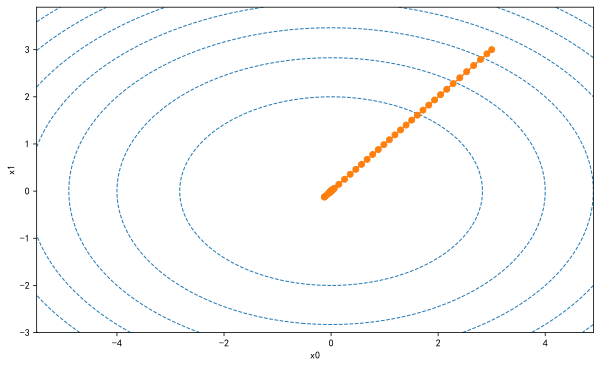

In [26]:
x0, x1 = res[:, 0], res[:, 1]
# display.set_matplotlib_formats("svg")
plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁâàÊú¨

In [27]:
def adaptive_momentum(lossfunc, w, x_dict, beta1=0.5, beta2=0.9, learn_rate=0.999, max_iter=1000, epsilon=1e-8):
    trace_w = w.clone().data.reshape(1, -1)
    v_0, s_0 = 0, 0
    i = 1
    while i <= max_iter:
        l = lossfunc(w=w, **x_dict)
        l.backward() 
        v_1 = (beta1*v_0 + (1 - beta1)*w.grad.data) / (1 - beta1**i)
        s_1 = (beta2*s_0 + (1 - beta2)*w.grad.data**2) / (1 - beta2**i)
        w.data.sub_(learn_rate * v_1/(torch.sqrt(s_1) + epsilon))
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if i % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break
   
        w.grad.zero_()
        v_0, s_0 = v_1, s_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{i - 1}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [28]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = adaptive_momentum(meanSquaredLoss, w, x_dict={'X': features, 'y': labels})

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 3.6747
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 3.2707
Ëø≠‰ª£Ê¨°Êï∞: 30, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.9554
Ëø≠‰ª£Ê¨°Êï∞: 40, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.5704
Ëø≠‰ª£Ê¨°Êï∞: 50, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.0602
Ëø≠‰ª£Ê¨°Êï∞: 60, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 1.4244
Ëø≠‰ª£Ê¨°Êï∞: 70, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.7589
Ëø≠‰ª£Ê¨°Êï∞: 80, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.2538
Ëø≠‰ª£Ê¨°Êï∞: 90, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0356
Ëø≠‰ª£Ê¨°Êï∞: 100, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0009
ÂÖ±Ëø≠‰ª£107Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[2.000168561935425], [-3.4000043869018555], [4.1993632316589355]]


## ÂèÇËÄÉËµÑÊñô
1. ÊùéËà™. ÁªüËÆ°Â≠¶‰π†ÊñπÊ≥ï. 2017.
2. [ÈòøÊñØÈ°ø¬∑Âº†„ÄÅÊùéÊ≤ê„ÄÅÊâéÂç°Èáå C. Á´ãÈ°ø„ÄÅ‰∫öÂéÜÂ±±Â§ß J. ÊñØËé´ÊãâÁ≠â. Âä®ÊâãÂ≠¶Ê∑±Â∫¶Â≠¶‰π†. 2020.](https://github.com/d2l-ai/d2l-zh)